In [1]:
import numpy as np
import pandas as pd

# Installing Tensorflow

* pip install Tensorflow --->in anaconda promt
* pip install tensorflow--->in jupiter notebook

# Installing keras

* pip install keras --->in anaconda prompt
* !pip install--upgrade keras--->in jupiter notebook

In [5]:
#pip install tensorflow
!pip install keras


In [11]:
import tensorflow as tf 
import keras
keras.__version__

'2.15.0'

In [10]:
tf.__version__

'2.15.0'

In [9]:
df=pd.read_excel('energy.xlsx') #Energy data set 
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# data Understanding
* At:Temperature
* V:vaccum
* AP:Pressure
* RH:Humidity
* PE:Energy

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [16]:
x=df.drop(columns='PE')
y=df['PE']

In [20]:
#splitting the dataset into the training set and test set

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

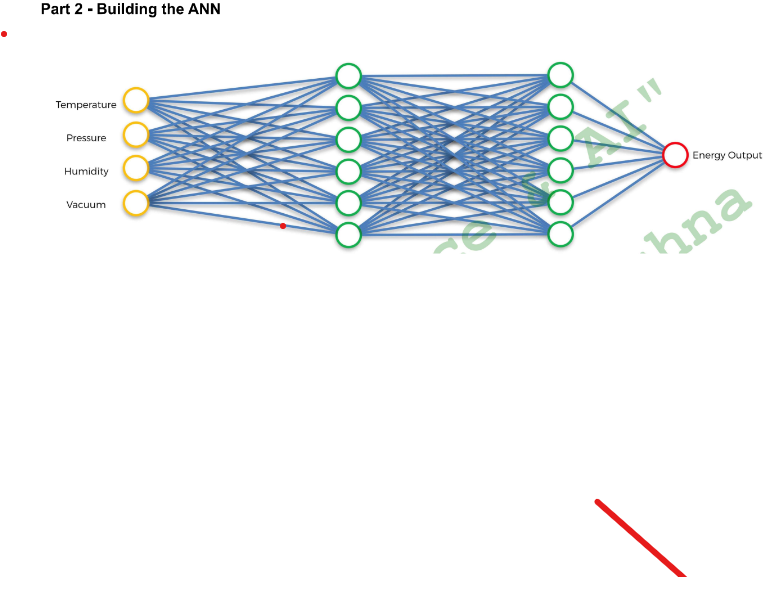

In [24]:
from keras.models import Sequential
from keras.layers import Dense

In [37]:
def ann_model_regressor():
    #initializing the ann
    model=Sequential()
    
    #adding the input layer 
    model.add(Dense(input_dim=4,units=6,activation='relu',kernel_initializer='uniform'))
    
    #adding the first hidden layer
    model.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
    
    #adding second hidden layer
    model.add(Dense(units=6,activation='relu',kernel_initializer='uniform'))
    
    #adding the output layer
    model.add(Dense(units=1,activation='relu',kernel_initializer='uniform'))
    
    #Compiling the ANN
    model.compile(optimizer='adam',loss='mean_squared_error')
    
    return model
    

In [41]:
ann=ann_model_regressor()
#training the ann model on the training set

ann.fit(x_train,y_train,batch_size=32,epochs=100)


Epoch 1/100
240/240 [==============================] - 1s 2ms/step - loss: 205293.0312
Epoch 2/100
240/240 [==============================] - 1s 3ms/step - loss: 157931.9375
Epoch 3/100
240/240 [==============================] - 1s 3ms/step - loss: 39231.8984
Epoch 4/100
240/240 [==============================] - 1s 2ms/step - loss: 15919.2617
Epoch 5/100
240/240 [==============================] - 0s 2ms/step - loss: 10187.7979
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 5564.8198
Epoch 7/100
240/240 [==============================] - 1s 2ms/step - loss: 2568.2927
Epoch 8/100
240/240 [==============================] - 0s 2ms/step - loss: 1102.0839
Epoch 9/100
240/240 [==============================] - 0s 2ms/step - loss: 463.4842
Epoch 10/100
240/240 [==============================] - 0s 2ms/step - loss: 205.4288
Epoch 11/100
240/240 [==============================] - 0s 2ms/step - loss: 103.4722
Epoch 12/100
240/240 [==============================] - 1s 

240/240 [==============================] - 0s 2ms/step - loss: 20.9691
Epoch 99/100
240/240 [==============================] - 0s 2ms/step - loss: 21.2268
Epoch 100/100
240/240 [==============================] - 0s 2ms/step - loss: 21.5159


In [42]:
#predicting the result

ypred_train=ann.predict(x_train)
ypred_test=ann.predict(x_test)


60/60 [==============================] - 0s 2ms/step


In [43]:
from sklearn.metrics import mean_squared_error
print("train_mse",mean_squared_error(y_train,ypred_train))
print("test mse",mean_squared_error(y_test,ypred_test))

train_mse 20.5437175817985
test mse 19.05020033027609


In [44]:
from sklearn.metrics import r2_score
print("train_r2",r2_score(y_train,ypred_train))
print("test_r2",r2_score(y_test,ypred_test))

train_r2 0.9293845094246257
test_r2 0.9348684012873334
